In [10]:
import pandas as pd
import plotly.express as px

# 1. Chargement du dataset
print("Chargement des données en cours...")
df = pd.read_parquet('data/yellow-taxi.parquet')

print("✅ Données chargées avec succès. Voici un aperçu :")
display(df.head())

Chargement des données en cours...
✅ Données chargées avec succès. Voici un aperçu :


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-05-01 00:59:15,2024-05-01 01:23:50,1.0,6.10,1.0,N,138,145,1,28.2,7.75,0.5,5.00,0.00,1.0,42.45,0.0,1.75
1,2,2024-04-30 23:58:26,2024-05-01 00:29:42,1.0,11.23,1.0,N,138,249,1,46.4,6.00,0.5,8.72,0.00,1.0,66.87,2.5,1.75
2,2,2024-05-01 00:57:17,2024-05-01 01:14:15,1.0,9.02,1.0,N,138,170,1,35.9,6.00,0.5,10.57,6.94,1.0,65.16,2.5,1.75
3,2,2024-05-01 00:24:47,2024-05-01 00:48:51,1.0,6.53,1.0,N,87,133,1,30.3,1.00,0.5,7.06,0.00,1.0,42.36,2.5,0.00
4,2,2024-05-01 00:11:20,2024-05-01 00:52:10,1.0,14.38,1.0,N,161,165,1,61.8,1.00,0.5,0.00,0.00,1.0,66.80,2.5,0.00


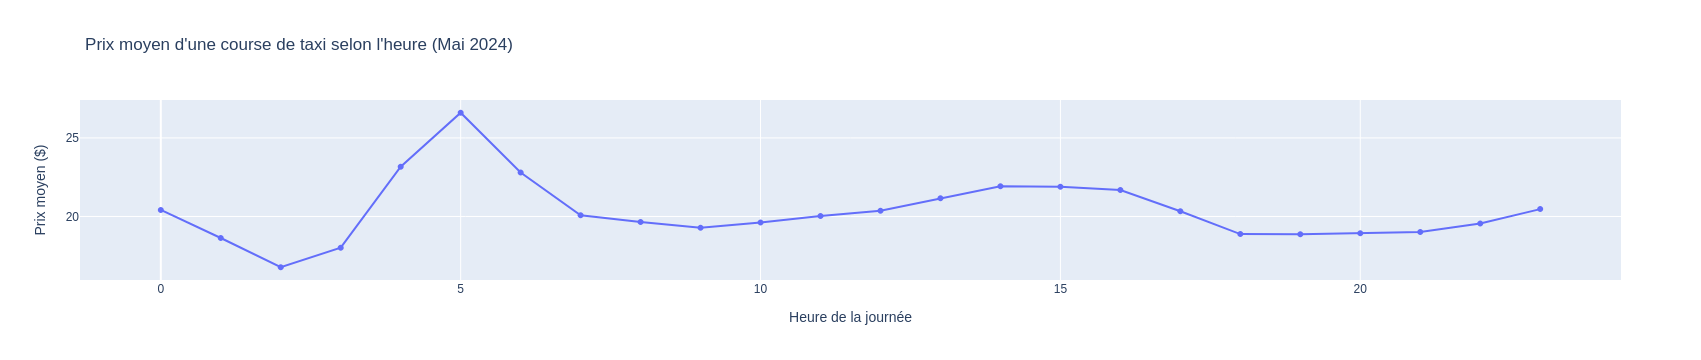

In [11]:
# 2. Petit nettoyage et préparation
# On filtre les trajets avec une distance et un prix positifs pour la cohérence
df_filtered = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)].copy()
df_filtered['tpep_pickup_datetime'] = pd.to_datetime(df_filtered['tpep_pickup_datetime'])
df_filtered['hour'] = df_filtered['tpep_pickup_datetime'].dt.hour

# 3. Analyse : Prix moyen par heure
stats_prix = df_filtered.groupby('hour')['fare_amount'].mean().reset_index()

# 4. Visualisation
fig = px.line(
    stats_prix, 
    x='hour', 
    y='fare_amount',
    title="Prix moyen d'une course de taxi selon l'heure (Mai 2024)",
    labels={'hour': 'Heure de la journée', 'fare_amount': 'Prix moyen ($)'},
    markers=True
)
fig.show()


In [12]:
# 5. Exportation du résultat dans le dossier créé par votre script init.sh
output_path = 'results/prix_moyen_par_heure.csv'
stats_prix.to_csv(output_path, index=False)
print(f"💾 Les statistiques agrégées ont été sauvegardées dans : {output_path}")

💾 Les statistiques agrégées ont été sauvegardées dans : results/prix_moyen_par_heure.csv


In [13]:
# Petit bonus : Afficher les 5 trajets les plus longs
print("\n--- Top 5 des trajets les plus longs ---")
display(df_clean.sort_values(by='trip_distance', ascending=False).head(5))


--- Top 5 des trajets les plus longs ---


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,tip_amount,pickup_hour
3579515,2024-05-18 21:21:00,2024-05-18 21:31:00,249151.44,16.30,0.00,21
3687564,2024-05-28 08:45:00,2024-05-28 09:26:00,241289.24,57.03,0.00,8
3393488,2024-05-07 07:22:00,2024-05-07 07:29:00,240124.26,8.52,0.00,7
3480214,2024-05-13 08:32:00,2024-05-13 09:11:00,201625.54,37.24,8.25,8
3429135,2024-05-10 09:25:00,2024-05-10 09:38:00,182726.11,25.47,5.39,9
